# LASSO回归

In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

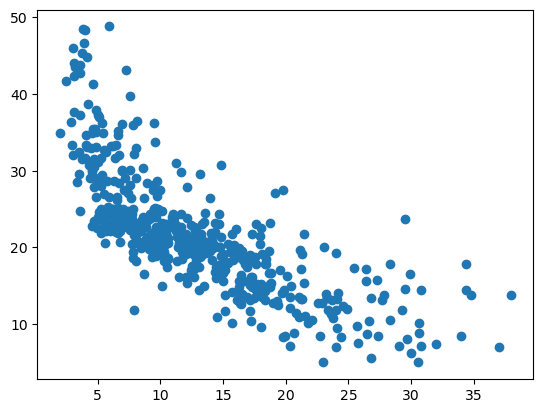

In [5]:
x=data[:,12]
y=target
x=x[y<50]
y=y[y<50]
plt.scatter(x,y)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
np.random.seed(666)
X_train,X_test,y_train,y_test=train_test_split(x.reshape(-1,1),y)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [8]:
poly_reg=PolynomialRegression(degree=20)
poly_reg.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [10]:
from sklearn.metrics import mean_squared_error
y_predict=poly_reg.predict(X_test)
mean_squared_error(y_test,y_predict)

771110.2793186186

In [11]:
def show_plot(model):
    plt.scatter(x,y)
    X_plot=np.linspace(0,40,100).reshape(100,1)
    y_plot=model.predict(X_plot)
    plt.plot(X_plot[:,0],y_plot,c='r')
    plt.axis([0,40,0,50])
    plt.show()

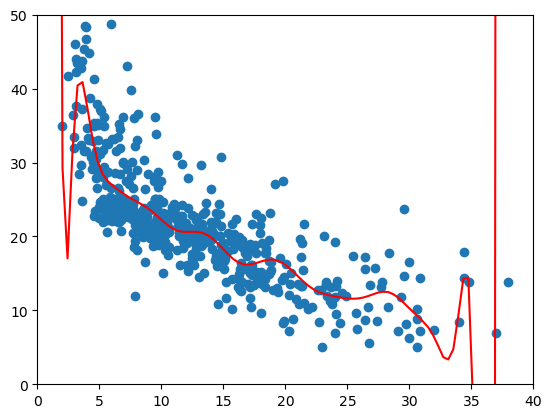

In [12]:
show_plot(poly_reg)

## LASSO正则化代码,alpha参数对结果影响：alpha过大将特征参数衰减为0从而变为一条直线

In [13]:
from sklearn.linear_model import Lasso

def LassoRegression(degree,alpha):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lasso_reg",Lasso(alpha=alpha))
    ])

In [14]:
lasso_reg=LassoRegression(20,0.0001)
lasso_reg.fit(X_train,y_train)
y_predict=lasso_reg.predict(X_test)
mean_squared_error(y_test,y_predict)

24.267811777670005

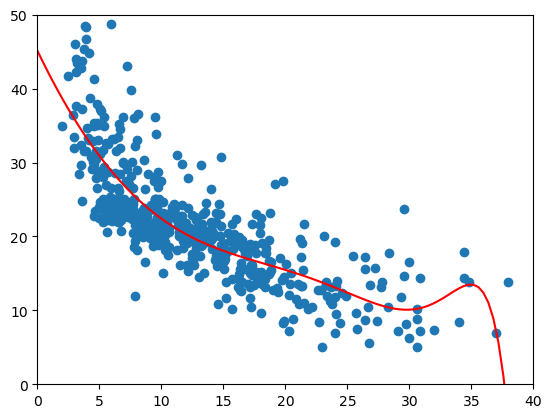

In [15]:
show_plot(lasso_reg)

# 岭回归alpha参数对结果影响：alpha过大将权重参数衰减为一个很小的值不会到0不会变为一条直线

In [20]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree,alpha):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lasso_reg",Ridge(alpha=alpha))
    ])

In [21]:
ridge_reg=RidgeRegression(20,0.0001)
ridge_reg.fit(X_train,y_train)
y_predict=ridge_reg.predict(X_test)
mean_squared_error(y_test,y_predict)

45.68106845714916

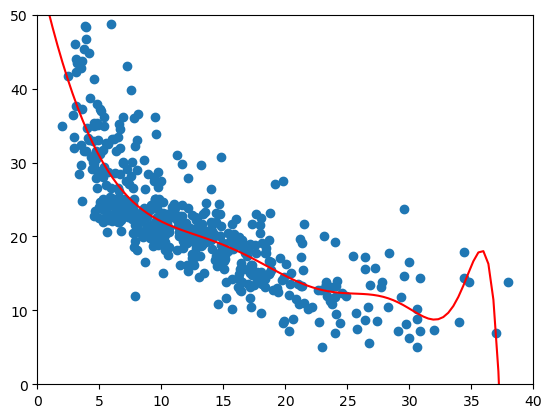

In [22]:
show_plot(ridge_reg)